# Load data, Import libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sys
sys.path.insert(0,"/content/drive/MyDrive/Colab Notebooks/DM-PROJECT")

In [93]:
# from google.colab import files
# files.upload()

In [94]:
# from google.colab import files
# files.upload()

In [5]:
%matplotlib inline
from all_imports import *
from adspy_shared_utilities import *
import warnings
warnings.filterwarnings('ignore')



## **Exploratory Data Analysis (EDA)**

In [6]:
def load_data():
    ''' Reads data and cleans dataset'''
    # Read dataset
    dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Mining/static/credit_card_clustering.csv')
    #Drops unwanted columns
    dataset= dataset.drop(columns =["CUST_ID"])
    dataset.isna().sum().sum()
    #Fill null values with the mean value
    # The Null values are imputed with the mean (864.21).
    #The variable “CREDIT_LIMIT” has only (1) null value and the null value is imputed with the mean (4494.45)
    dataset['MINIMUM_PAYMENTS']=dataset['MINIMUM_PAYMENTS'].fillna(value=dataset['MINIMUM_PAYMENTS'].mean())
    dataset['CREDIT_LIMIT']=dataset['CREDIT_LIMIT'].fillna(value=dataset['CREDIT_LIMIT'].mean())

    return dataset


    


In [22]:
dataset.describe().T


,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


#Visualizations

In [7]:
def kernel_density_plots(dataset):
    ''' KDE Plots'''

    ax = dataset[['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY',
                'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
                'CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT']].plot.kde(figsize=(12,9), bw_method=3) 


In [8]:
def viz_tenure(dataset):

     plt.figure(figsize=(16,5))
     plt.subplot(1,2,1)
     sns.lineplot(x='TENURE',y='PURCHASES',data=dataset)
     plt.title('The Purchases based on Tenure of credit card service for use')




In [9]:
def correlation(dataset):
    '''Visualization Correlation Matrix'''
    corr = dataset.corr()
    colormap =sns.palplot(sns.diverging_palette(250, 15, s=75, l=40,
                                  n=9, center="dark"))

    plt.figure(figsize = (15,12))
    sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,fmt='.2f',linewidths=0.30,
            cmap = colormap, linecolor='white')
    plt.title('Correlation matrix variables in dataset', y = 1.05, size=15)


In [10]:
def histo(dataset):
  ''' Frecuency Histograms'''

  i=1
  plt.figure(figsize= (20,20))
  for col in dataset.select_dtypes(['int','float64']).columns:
      plt.subplot(9,2,i)
      sns.distplot(dataset[col])
      i=i+1
  plt.show()



# Purchase 

In [11]:
def purchases(dataset):
    '''Purchase analysis'''

    corr_m = dataset.corr()
    cor_purchases = corr_m["PURCHASES"]
    corr_purchase=  cor_purchases[cor_purchases>0.5].sort_values(ascending=False)
    print(corr_purchase)
    print('----------------------')
    print('{0:.2f}%'.format(100*sum(dataset.PURCHASES == dataset.ONEOFF_PURCHASES + dataset.INSTALLMENTS_PURCHASES)/dataset.shape[0]))

    #Plots
    sns.pairplot(dataset[['PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']],
             markers="+",
             kind='reg',
             diag_kind=None, 
             height=4)




# Dimensionality Reduction 

In [12]:


def pca_analysis(dataset):
    #select all data except CUST_ID
    '''   PCA Analysis'''
    dataset = load_data()
    cc_data_for_PCA = dataset

    #standardize
    cc_data_for_PCA_scaled = (cc_data_for_PCA - cc_data_for_PCA.mean(axis=0)) / cc_data_for_PCA.std(axis=0)

    from sklearn.decomposition import PCA

    #create principal components (2 axes based on elbow method below)
    pca = PCA()
    cc_data_pca = pca.fit_transform(cc_data_for_PCA_scaled)

    #convert to dataframe
    component_names = [f"PC{i+1}" for i in range(cc_data_pca.shape[1])]
    cc_data_pca = pd.DataFrame(cc_data_pca, columns=component_names)
    #plot data using principal components
    sns.scatterplot(x=cc_data_pca.loc[:,'PC1'],y=cc_data_pca.loc[:,'PC2'])
    plt.title('PC1 vs PC2')
    plt.show()
        
    loadings = pd.DataFrame(
        pca.components_.T,  # transpose the matrix of loadings
        columns=component_names,  # so the columns are the principal components
        index=dataset.loc[:, (dataset.columns != 'CUST_ID')].columns,  # and the rows are the original features
    )
    print(loadings)
    loadings[['PC1','PC2','PC3','PC4','PC5']].round(3)
    plt.figure(figsize=(20,10))
    plt.xticks(rotation=60, ha='right')
    plt.plot( loadings['PC3'])

    #PC1 is characterized by how much the card owner purchases using card
    #PC2 is characterized by how much the card owner takes cash advances using card


The list of features below are those with an absolute coefficient (loading) > 0.1. These include  variables such as purchase, one off purchase. The first principal component explains 73 % of the variance - the spectral plot below shows that one feature (ONEOFF_PURCHASES) has a substantially larger coefficient (loading) than the others, indicating it as a primary driver of variance. Pc1 top variables are: PURCHASES, ONE-OFF_PURCHASES,PURCHASES_FREQUENCY, PAYMENTS.

# Clustering

Clustering Kmeans without PCA

In [48]:
def clustering_k_value():
    ''' Clustering Algorithm- Finding ideal k value'''
 
    dataset = load_data()
    # Before applying PCA, each feature should be centered (zero mean) and with unit variance
    X_normalized = StandardScaler().fit(dataset).transform(dataset)  
    # Ideal number of clusters
    model = KMeans(random_state=42)
    distortion_visualizer = KElbowVisualizer(model, k=(2,10))

    distortion_visualizer.fit(X_normalized)       
    distortion_visualizer.show() 

  


In [44]:
def clustering_without_PCA(dataset):
    ''' Clustering Algorithm'''
 
 
    # Before applying PCA, each feature should be centered (zero mean) and with unit variance
    X_normalized = StandardScaler().fit(dataset).transform(dataset)  
    # Ideal number of clusters
  
    #K means used to find 4 clusters
    kmeans = KMeans(n_clusters = 4, random_state= 42)
    kmeans.fit(X_normalized)

    plot_labelled_scatter(X_normalized, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])


    kmeans= KMeans(n_clusters=4, n_init=10, init= 'k-means++', algorithm='full', max_iter=300)
    kmeans.fit(X_normalized)
    labels= kmeans.labels_
    #Plotting countplot of clusters

    pl = sns.countplot(x=labels)
    pl.set_title("Distribution Of The Clusters")
    plt.show()

Clustering with Kmeans and PCA

In [90]:
def clustering_with_pca():
    dataset = load_data()
    # Before applying PCA, each feature should be centered (zero mean) and with unit variance
    X_normalized = StandardScaler().fit(dataset).transform(dataset)  
    # Clustering after reducing the data
    kmeans= KMeans(n_clusters=4, n_init=10, init= 'k-means++', algorithm='full', max_iter=300)
    kmeans.fit(X_normalized)
    labels= kmeans.labels_
    pca2= PCA(n_components=2)
    pca22= pca2.fit_transform(X_normalized)
    pca_df = pd.DataFrame(data=pca22, columns=['pca1','pca2'])
    pca_df['labels']= labels
 
    print(pca_df.head())
    plt.figure(figsize=(10,10))
    ax = sns.scatterplot(x='pca1', y='pca2', hue='labels', data=pca_df, palette='Set2')
    clusters = pd.concat([dataset, pd.DataFrame({'CLUSTER':labels})], axis=1).round(2)
    clusters2 =clusters[1:5].T
    print(clusters2)
   
    

# Results

In [23]:
def main():
  dataset = load_data()
  kernel_density_plots(dataset)
  viz_tenure(dataset)
  correlation(dataset)
  histo(dataset)
  purchases(dataset)
 


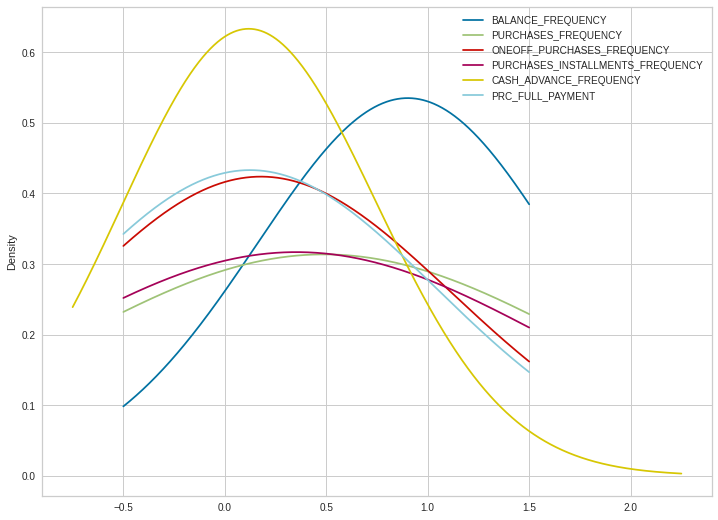

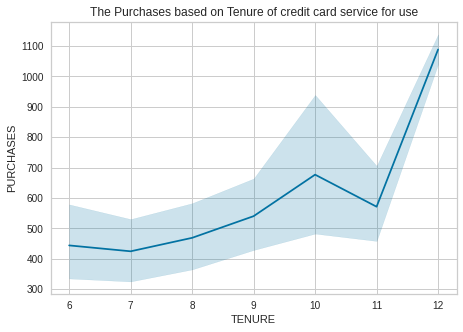

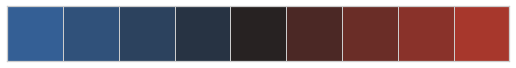

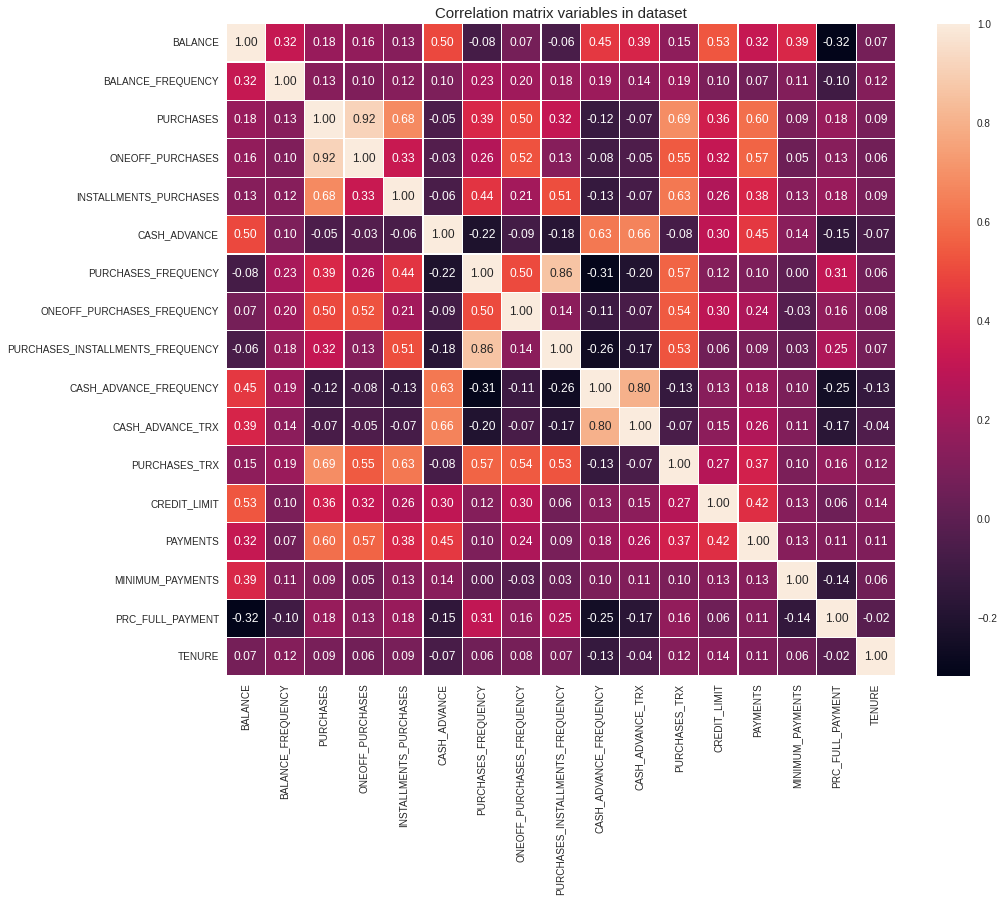

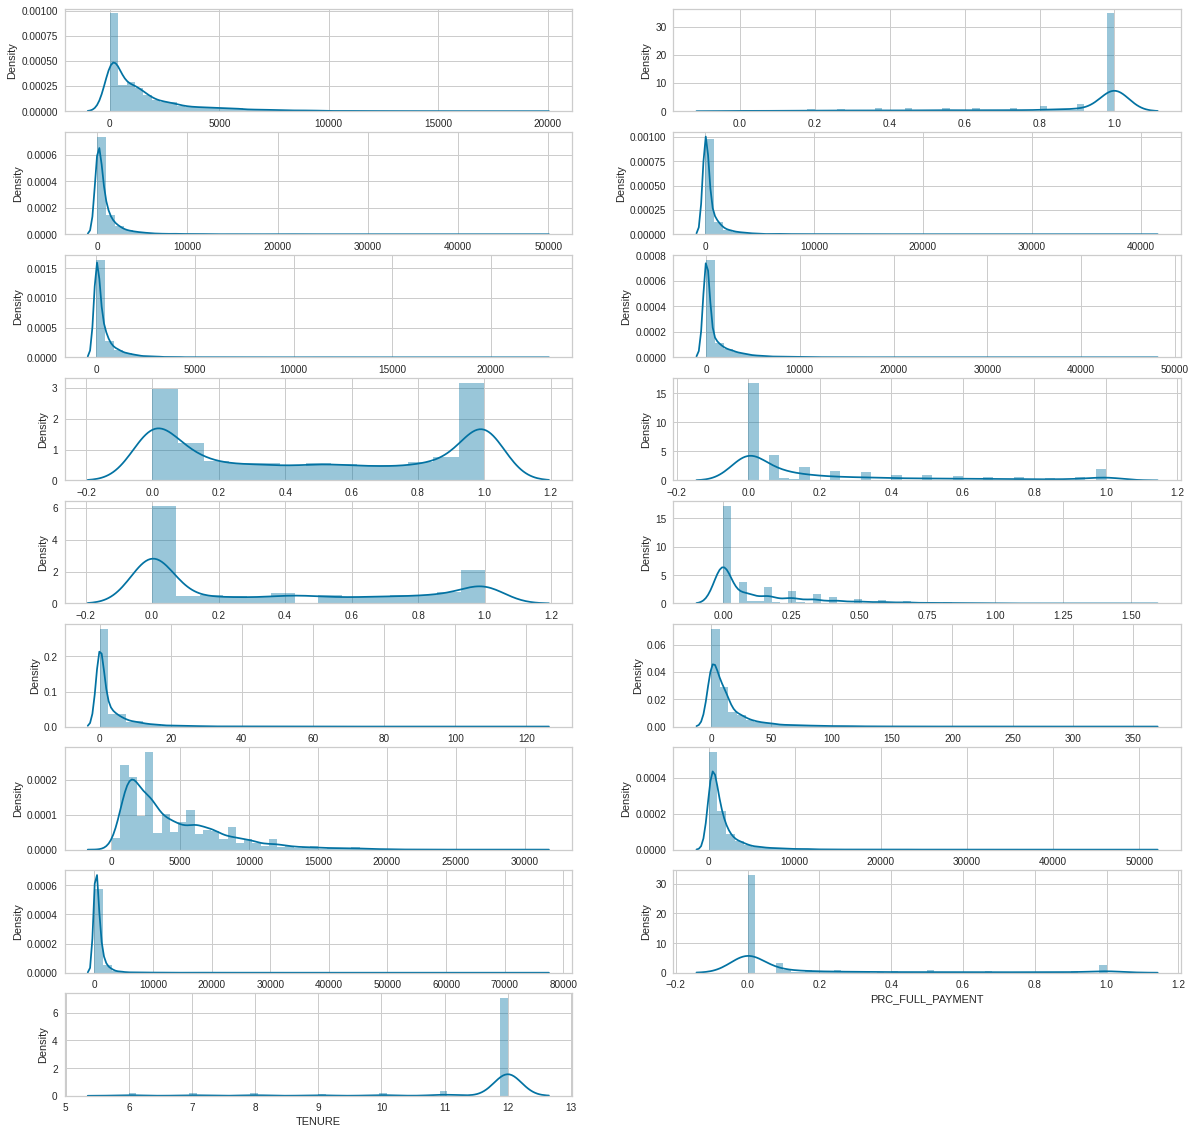

PURCHASES                 1.000000
ONEOFF_PURCHASES          0.916845
PURCHASES_TRX             0.689561
INSTALLMENTS_PURCHASES    0.679896
PAYMENTS                  0.603264
Name: PURCHASES, dtype: float64
----------------------
94.50%


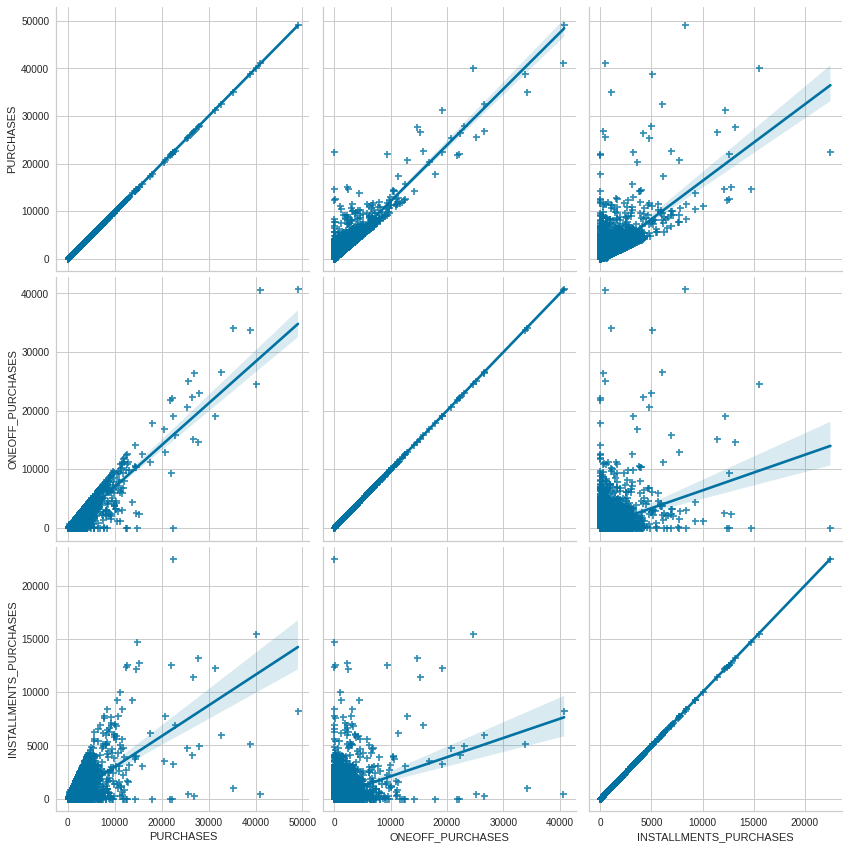

In [24]:
main()

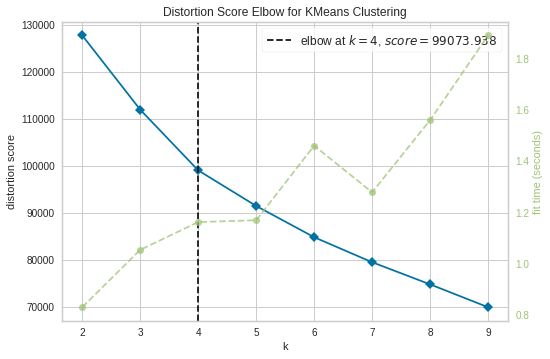

In [51]:
clustering_k_value()

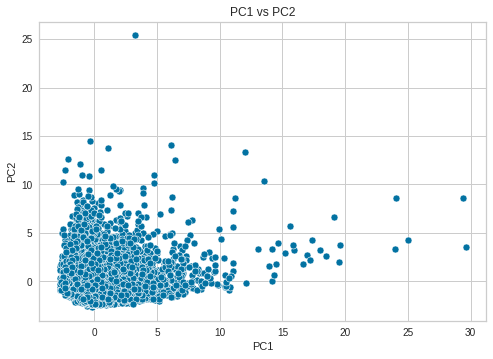

                                       PC1       PC2  ...      PC16      PC17
BALANCE                           0.101077  0.403957  ... -0.005264  0.000042
BALANCE_FREQUENCY                 0.120043  0.130537  ... -0.011175  0.000009
PURCHASES                         0.411642  0.041038  ...  0.002191 -0.748975
ONEOFF_PURCHASES                  0.346407  0.062872  ... -0.004630  0.581943
INSTALLMENTS_PURCHASES            0.336814 -0.018533  ...  0.014566  0.316826
CASH_ADVANCE                     -0.023343  0.439242  ... -0.007033  0.000022
PURCHASES_FREQUENCY               0.321493 -0.190780  ...  0.678157 -0.000159
ONEOFF_PURCHASES_FREQUENCY        0.294633 -0.017924  ... -0.341535  0.000143
PURCHASES_INSTALLMENTS_FREQUENCY  0.274710 -0.178601  ... -0.633640  0.000173
CASH_ADVANCE_FREQUENCY           -0.089139  0.434082  ...  0.040713 -0.000015
CASH_ADVANCE_TRX                 -0.048654  0.419734  ... -0.013915  0.000011
PURCHASES_TRX                     0.390695 -0.019394  ...  0.135

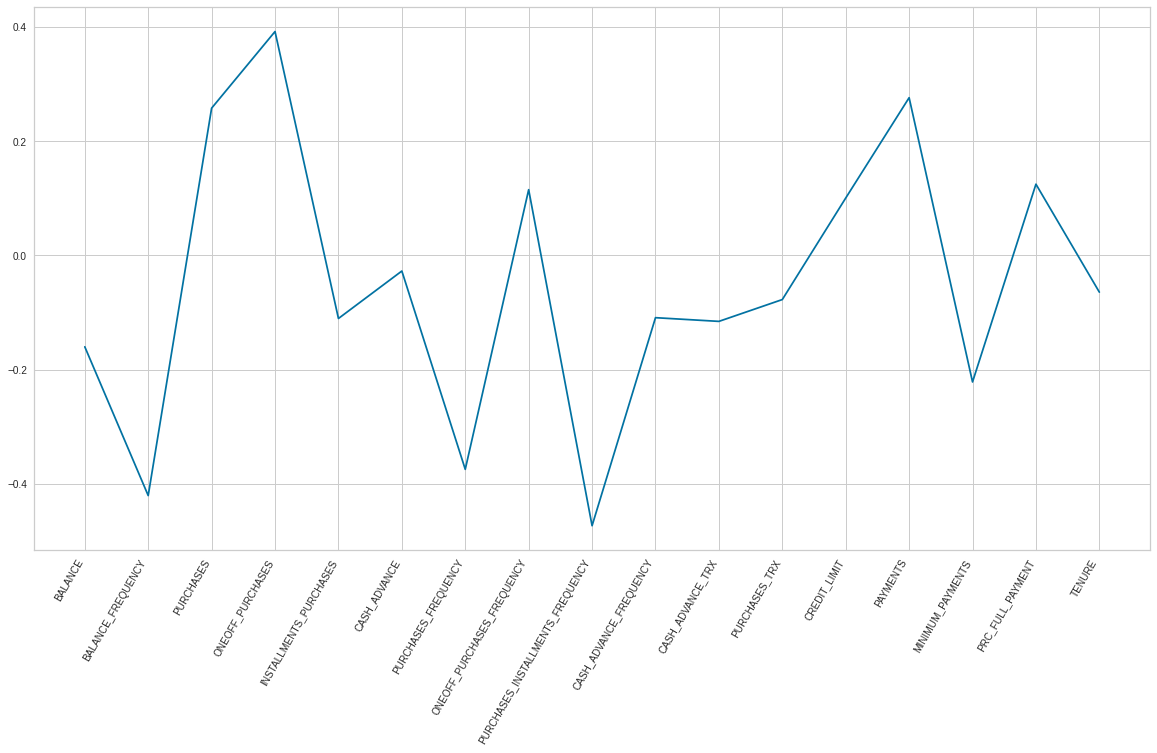

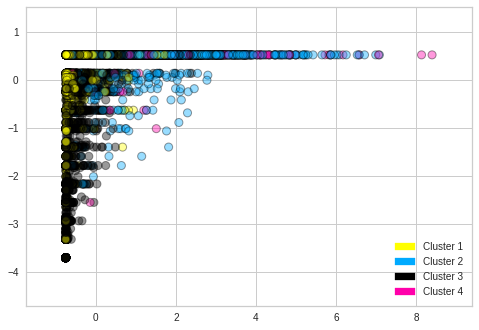

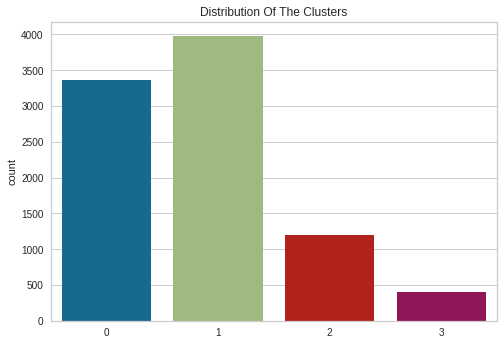

In [55]:
def clusters():
  dataset = load_data()
  pca_analysis(dataset)
  clustering_without_PCA(dataset)

clusters()

       pca1      pca2  labels
0 -1.682222 -1.076451       0
1 -1.138299  2.506483       2
2  0.969686 -0.383512       3
3 -0.873630  0.043167       0
4 -1.599434 -0.688582       0
                                        1        2        3        4
BALANCE                           3202.47  2495.15  1666.67   817.71
BALANCE_FREQUENCY                    0.91     1.00     0.64     1.00
PURCHASES                            0.00   773.17  1499.00    16.00
ONEOFF_PURCHASES                     0.00   773.17  1499.00    16.00
INSTALLMENTS_PURCHASES               0.00     0.00     0.00     0.00
CASH_ADVANCE                      6442.95     0.00   205.79     0.00
PURCHASES_FREQUENCY                  0.00     1.00     0.08     0.08
ONEOFF_PURCHASES_FREQUENCY           0.00     1.00     0.08     0.08
PURCHASES_INSTALLMENTS_FREQUENCY     0.00     0.00     0.00     0.00
CASH_ADVANCE_FREQUENCY               0.25     0.00     0.08     0.00
CASH_ADVANCE_TRX                     4.00     0.00     1.00  

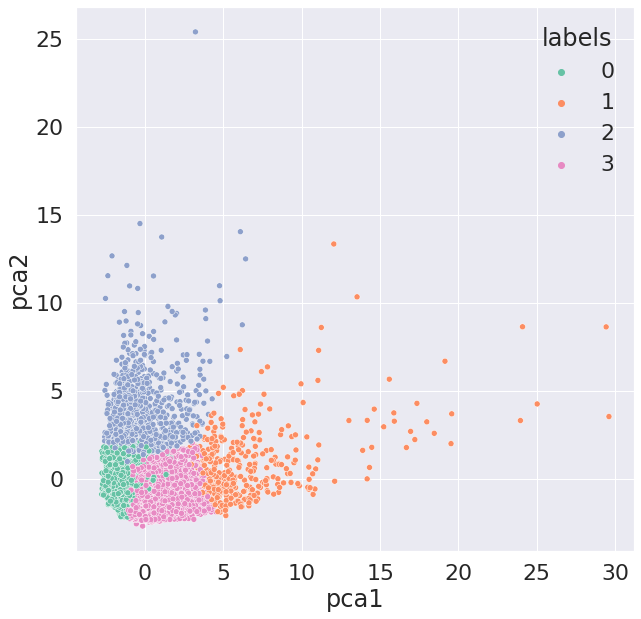

In [92]:
clustering_with_pca()

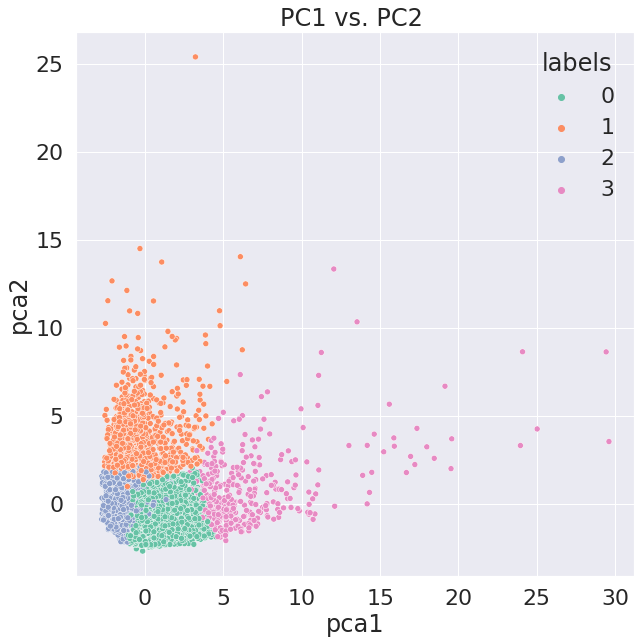

In [111]:
sns.set(font_scale = 2)
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca1', y='pca2', hue='labels', data=pca_df, palette='Set2').set(title='PC1 vs. PC2 ')

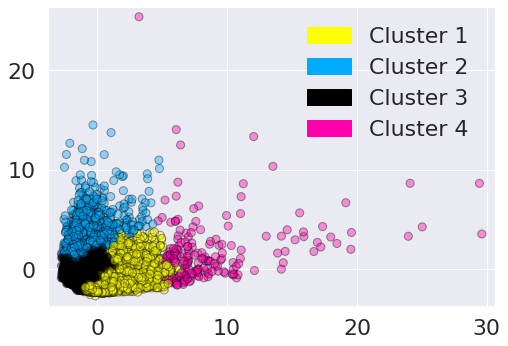

In [131]:

# Agglomerative clustering class

cls = AgglomerativeClustering(n_clusters = 4)
cls_assignment = cls.fit_predict(pca22)

plot_labelled_scatter(pca22, cls_assignment, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3 ', 'Cluster 4'])

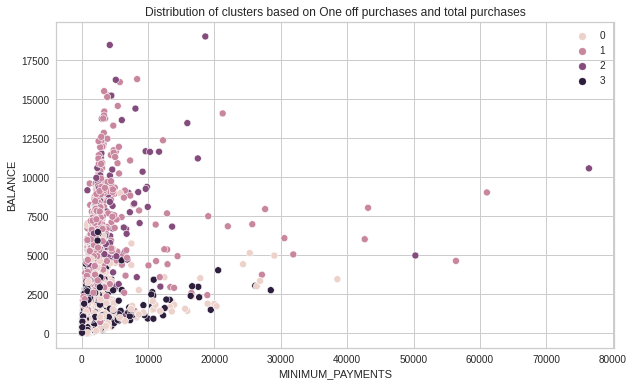

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=dataset, x='MINIMUM_PAYMENTS', y='BALANCE', hue=labels)
plt.title('Distribution of clusters based on One off purchases and total purchases')
plt.show()